In [33]:
# Import the libraries we need to use in this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
import torchvision

torch.set_printoptions(linewidth=120)

IMAGE_SIZE = 16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

train_set = dsets.FashionMNIST(root='./data',train=True,download=True,transform=composed)

In [6]:
# Make the validating 

validation_dataset = dsets.FashionMNIST(root='./data', train=False, download=True, transform=composed)

In [7]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100,shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [9]:
len(validation_dataset)

10000

In [10]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [13]:
sample=next(iter(train_set))

In [17]:
sample[1]

9

In [18]:
type(sample)

tuple

In [19]:
image,label=sample

In [20]:
image.shape

torch.Size([1, 16, 16])

In [21]:
label.shape

AttributeError: 'int' object has no attribute 'shape'

label 9


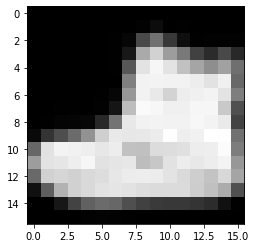

In [22]:
plt.imshow(image.squeeze(),cmap='gray')
print('label',label)

In [23]:
batch=next(iter(train_loader))

In [28]:
type(batch)

list

In [29]:
images, labels = batch

In [30]:
images.shape

torch.Size([100, 1, 16, 16])

In [31]:
labels.shape

torch.Size([100])

labels tensor([5, 2, 1, 7, 0, 6, 8, 7, 8])


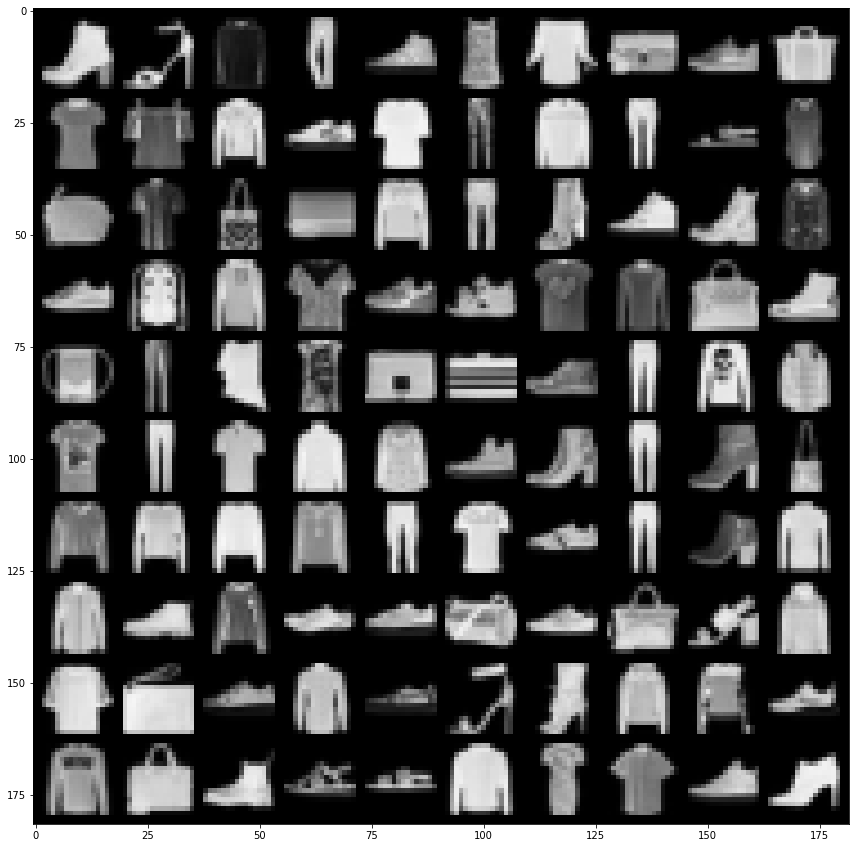

In [34]:
grid=torchvision.utils.make_grid(images,nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

print('labels', labels[1:10])

In [46]:
import torch.nn as nn
import torch.nn.functional as F
class Network(nn.Module):
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(Network, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out
    
    # Outputs in each steps
    def activations(self, x):
        #outputs activation this is not necessary
        z1 = self.cnn1(x)
        a1 = self.relu1(z1)
        out = self.maxpool1(a1)
        
        z2 = self.cnn2(out)
        a2 = self.relu2(z2)
        out = self.maxpool2(a2)
        out = out.view(out.size(0),-1)
        return z1, a1, z2, a2, out

In [47]:
network = Network()
sample = next(iter(train_set))
image, label = sample
image.shape 

torch.Size([1, 16, 16])

In [69]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

In [74]:
# Train the model

n_epochs=3
train_loss_list=[]
valid_loss_list=[]
accuracy_list=[]
N_test=len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = network(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        train_loss_list.append(loss.data)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = network(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
            
        loss = criterion(z, y_test)
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
        valid_loss_list.append(loss.data)
        
train_model(n_epochs)

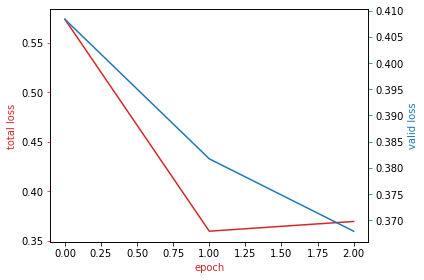

In [75]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('valid loss', color=color)  
ax2.plot( valid_loss_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [56]:
batch = next(iter(train_loader))

In [57]:
images,labels=batch

In [58]:
images.shape

torch.Size([100, 1, 16, 16])

In [59]:
labels.shape

torch.Size([100])

In [60]:
preds=network(images)

In [61]:
preds.shape

torch.Size([100, 10])

In [62]:
preds.argmax(dim=1)

tensor([0, 8, 8, 8, 0, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 0, 8, 8, 8, 0, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [63]:
labels

tensor([4, 9, 6, 9, 8, 2, 3, 0, 6, 9, 7, 4, 0, 8, 0, 0, 8, 7, 5, 6, 7, 0, 3, 4, 9, 2, 5, 0, 3, 0, 8, 7, 5, 3, 8, 6, 5,
        7, 9, 3, 6, 7, 1, 4, 1, 4, 8, 5, 8, 3, 8, 1, 3, 4, 2, 9, 7, 7, 9, 9, 4, 3, 8, 3, 8, 0, 7, 2, 1, 7, 4, 4, 7, 5,
        0, 4, 3, 9, 0, 4, 6, 9, 0, 8, 3, 0, 8, 8, 0, 9, 6, 2, 5, 0, 5, 6, 5, 0, 5, 1])

In [64]:
pred.argmax(dim=1).eq(labels).sum()

tensor(15)

In [65]:
####################backprop###########################
import torch.optim as optim


In [66]:
loss = F.cross_entropy(preds, labels)
loss.item()

2.295720338821411

In [291]:
#################gradient#######################
print(network.conv1.weight.grad)

None


In [292]:
loss.backward()

In [293]:
print(network.conv1.weight.grad.shape)

torch.Size([6, 1, 5, 5])


In [294]:
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [295]:
loss.item()

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [296]:
get_num_correct(preds, labels)

9

In [297]:
optimizer.step() #Updating parameters

In [298]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [299]:
loss.item()

2.2712488174438477

In [300]:
get_num_correct(preds, labels)

14

In [301]:

for epoch in range(5):
    total_loss = 0
    total_correct = 0
    for batch in train_loader:
        images,labels=batch

        preds=network(images)
        loss=F.cross_entropy(preds,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch", 0, "total_correct", total_correct, "loss:", total_loss)

epoch 0 total_correct 47357 loss: 331.63231985270977
epoch 0 total_correct 51697 loss: 226.72503659129143
epoch 0 total_correct 52038 loss: 213.70362403988838
epoch 0 total_correct 52394 loss: 205.70256458222866
epoch 0 total_correct 52683 loss: 196.6464384496212


In [314]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [315]:
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [316]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)
    

In [317]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4879    4   94  230   20    2  755    0   16    0]
 [  10 5688    1  278    8    0   11    0    4    0]
 [  36    4 5023   38  565    3  321    0   10    0]
 [  62    8   22 5507  302    0   93    2    4    0]
 [   4    6  531  125 5000    1  328    0    5    0]
 [   0    0    0    0    0 5799    1  143   23   34]
 [ 647    2  612  129  481    0 4108    0   21    0]
 [   0    0    0    0    0   33    0 5783    6  178]
 [  18    0   19   16   35   10  105   13 5781    3]
 [   0    0    1    0    0   19    1  168    4 5807]]


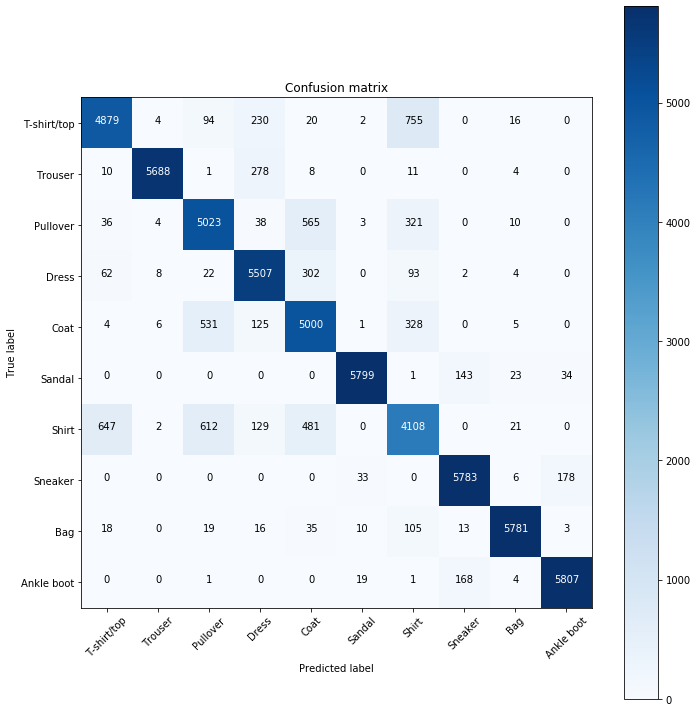

In [333]:
names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot')


cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, names)

In [334]:
from torch.utils.tensorboard import SummaryWriter

ImportError: cannot import name '_pywrap_tensorflow' from 'tensorboard.compat' (C:\Users\prem\Anaconda3\lib\site-packages\tensorboard\compat\__init__.py)